In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras import backend
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [3]:
# Versioning
print(keras.__version__)
print(tensorflow.__version__)

2.11.0
2.11.0


In [4]:
import csv
with open('bank_50_option_365_CE.csv', 'r') as infile, open('output.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    delete_column = -1  # index of the column you want to delete
    
    for row in reader:
        if row[delete_column] == '-':
            del row[delete_column]
        writer.writerow(row)

In [5]:
#Pandas DataFrame
option_df = pd.read_csv("output.csv")
option_df.tail()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
5111,NIFTY,24-Mar-2023,29-Mar-2023,CE,16900,234.00,257.45,129.20,140.65,133.00,140.65,397943,3400663.40,38045.05,1646550,1045300,16945.05
5112,NIFTY,24-Mar-2023,29-Mar-2023,CE,16950,201.40,218.70,102.55,113.60,106.45,113.60,340873,2914599.78,25701.10,1129750,997250,16945.05
5113,NIFTY,24-Mar-2023,29-Mar-2023,CE,17000,159.90,182.25,79.10,88.95,83.00,88.95,2267633,19422969.04,148088.54,7990700,5288900,16945.05
5114,NIFTY,24-Mar-2023,29-Mar-2023,CE,17050,138.35,148.60,58.00,68.65,63.20,68.65,1619854,13897769.39,88514.04,2264950,1892650,16945.05
5115,NIFTY,24-Mar-2023,29-Mar-2023,CE,16700,402.70,429.90,270.10,289.25,278.40,289.25,14598,124481.00,2587.70,185650,69950,16945.05


In [6]:
option_df.drop(option_df.columns[[0,1,2,3,5,6,7,8,9,11,12,13,14,15]], axis=1,inplace=True)

In [7]:
print (option_df)

      Strike Price  Settle Price  Underlying Value
0            21000         27.85          18127.35
1            22000         12.60          18127.35
2            23000         12.90          18127.35
3            24000          3.95          18127.35
4            18000        797.05          18127.35
...            ...           ...               ...
5111         16900        140.65          16945.05
5112         16950        113.60          16945.05
5113         17000         88.95          16945.05
5114         17050         68.65          16945.05
5115         16700        289.25          16945.05

[5116 rows x 3 columns]


In [8]:
option_df = option_df.rename(columns={'Strike Price':'strike', 'Settle Price':'Call price', 'Underlying Value':'Stock'})

In [9]:
option_df

,strike,Call price,Stock
0,21000,27.85,18127.35
1,22000,12.60,18127.35
2,23000,12.90,18127.35
3,24000,3.95,18127.35
4,18000,797.05,18127.35
...,...,...,...
5111,16900,140.65,16945.05
5112,16950,113.60,16945.05
5113,17000,88.95,16945.05
5114,17050,68.65,16945.05


In [10]:
option_df = option_df.astype({"strike":"float","Call price":"float", "Stock":"float"})

Normalizing the data

In [11]:
option_df['Stock'] = option_df['Stock'].div(option_df.strike)
option_df['Call price'] = option_df['Call price'].div(option_df.strike)
option_df['strike'] = 1


In [12]:
## Move data into numpy array
prices = option_df.values

In [13]:
for i in prices:
    for j in i:
        print (j)
    break

1.0
0.0013261904761904763
0.8632071428571428


In [14]:
# X values
X = prices[:,np.r_[0,2]]

# Y values 
y = prices[:,1]

# # Use Sklearn library to randomly split data into training/testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print (y)

[0.00132619 0.00057273 0.00056087 ... 0.00523235 0.00402639 0.01732036]


In [29]:
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten())  # This function flattens the input data

# Feel free to play around with different parameters here like number of units in each layer or switching the activation function or increasing/decreasing the number of layers.
model.add(Dense(512, activation='relu'))    

model.add(Dense(256, activation='relu')) 

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='softmax'))   # The number of units in the last layer should always be the number of classes in which we have to classify our input data.

In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
batch_size = 128
epochs = 50

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))  # You can set verbose to 1 to get the status of your model training, 2 to get one line per epoch, here I kept it 0 to keep the notebook precise. 

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0039
Train: 0.006, Test: 0.004


In [139]:
history.summary()

AttributeError: 'History' object has no attribute 'summary'

In [130]:
callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 1)]

In [131]:
model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.1, verbose = 2, callbacks = callbacks_list)

Epoch 1/10
29/29 - 1s - loss: nan - val_loss: nan - 1s/epoch - 35ms/step
Epoch 2/10
29/29 - 0s - loss: nan - val_loss: nan - 232ms/epoch - 8ms/step


In [132]:
predictions = model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


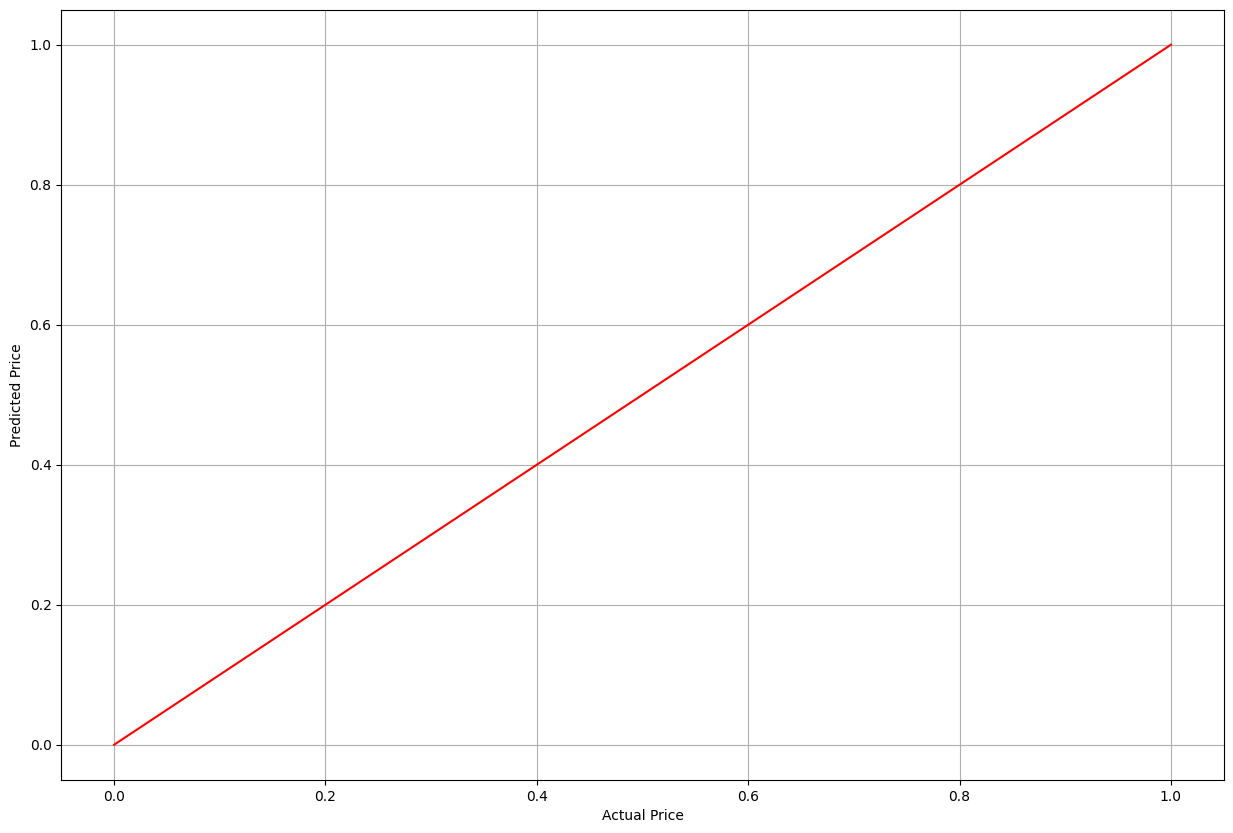

In [133]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([0,1], [0,1], 'r')
plt.grid(True)

In [69]:
X_test

array([[1.69500000e+04, 8.22212389e-02, 6.21625290e-05, 1.00000000e+00],
       [1.78000000e+04, 1.88202247e-04,            nan, 1.00000000e+00],
       [1.87000000e+04, 8.28877005e-05, 4.90488719e-05, 1.00000000e+00],
       ...,
       [1.74500000e+04, 6.55386819e-02, 5.94669994e-05, 1.00000000e+00],
       [1.92000000e+04, 2.23958333e-04, 4.81618924e-05, 1.00000000e+00],
       [2.00000000e+04, 4.50000000e-05, 4.23626250e-05, 1.00000000e+00]])

In [134]:
predictions

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)